#  Figure 15
## Sliding window benchmark on MMLU 5-shot 

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [62]:
cb_palette = ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000', '#3CAB20', '#6B750C', '#A6761D', '#D8A21E', '#F0E442',
              '#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF']

In [63]:
def return_bmk_values(path):
    files = sorted(os.listdir(path))
    ordered_list = [[x, int(x.split('_')[1])] for x in files]
    ordered_list.sort(key=lambda x:x[1])
    #print(len(ordered_list))
    values=[]
    for x in ordered_list:
        p = path+os.sep+x[0]
        df = pd.read_json(p)
        values.append(df["mmlu"].iloc[0])

    
    values = [x * 100 for x in values]

    return values, ordered_list

In [64]:
values_llama2_7b, ordered_list = return_bmk_values("./csv/sliding_window/MMLU/5_sliding/llama2-7b")
values_llama3_8b, _ = return_bmk_values("./csv/sliding_window/MMLU/5_sliding/llama3-8b")
values_mistral, _ = return_bmk_values("./csv/sliding_window/MMLU/5_sliding/mistral")

['[2_6]', '[4_8]', '[6_10]', '[8_12]', '[10_14]', '[12_16]', '[14_18]', '[16_20]', '[18_22]', '[20_24]', '[22_26]', '[24_28]', '[26_30]', '[28_32]']


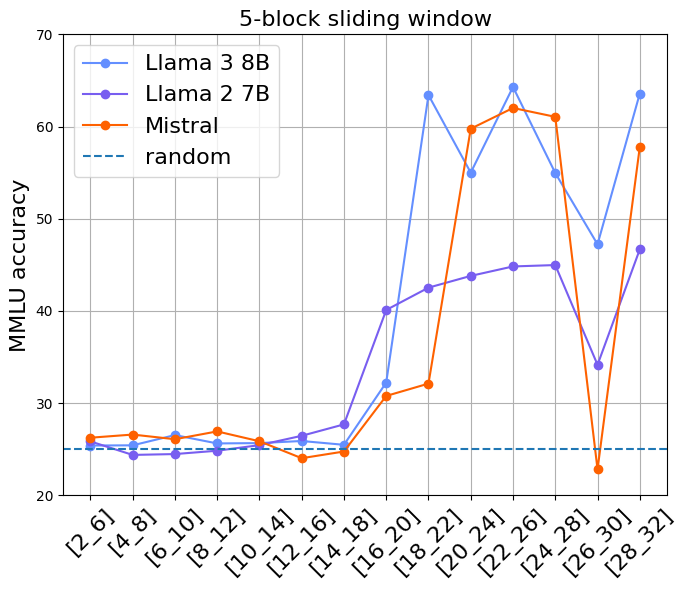

In [65]:
labels = ["["+str(x[1])+"_"+str(x[1]+4)+"]"for x in ordered_list]
print(labels)
#plt.figure()
fig, ax = plt.subplots(figsize=(7,6))

#ax.set_xticks(["0"]+labels)
ax.set_xticks([x for x in range(len(values_llama2_7b))])
ax.tick_params(axis='x',labelrotation=45)
ax.set_xticklabels(labels,fontsize=16)
plt.plot(values_llama3_8b,marker='o',label="Llama 3 8B",color=cb_palette[0])
plt.plot(values_llama2_7b,marker='o',label="Llama 2 7B",color=cb_palette[1])
plt.plot(values_mistral,marker='o',label="Mistral",color=cb_palette[3])


plt.grid(True)
plt.title("5-block sliding window",fontsize=16)
plt.ylabel("MMLU accuracy",fontsize=16)
plt.ylim(20,70)
plt.axhline(y=25, linestyle='dashed',label="random")

plt.tight_layout()
plt.legend(fontsize=16)
#plt.savefig("5_block.png")

## 3 Sliding windows MMLU 5-Shot 

In [66]:
values_llama2_7b, _ = return_bmk_values("./csv/sliding_window/MMLU/3_sliding/llama2-7b") 
values_llama3_8b, ordered_list = return_bmk_values("./csv/sliding_window/MMLU/3_sliding/llama3-8b")
values_mistral, _ = return_bmk_values("./csv/sliding_window/MMLU/3_sliding/mistral")

['[22_24]', '[23_25]', '[24_26]', '[25_27]', '[26_28]', '[27_29]', '[28_30]', '[29_31]', '[30_32]']


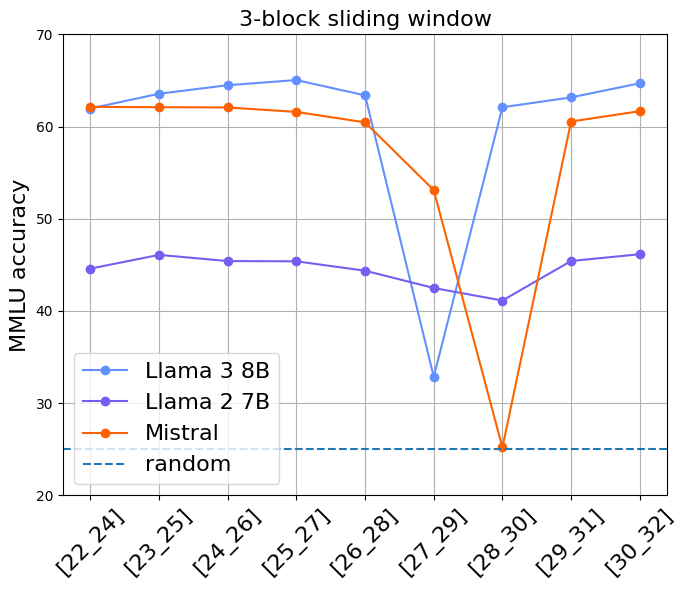

In [67]:
labels = ["["+str(x[1])+"_"+str(x[1]+2)+"]"for x in ordered_list]
print(labels)
fig, ax = plt.subplots(figsize=(7,6))
#ax.set_xticks(["0"]+labels)
ax.set_xticks([x for x in range(len(values_llama3_8b))])
ax.tick_params(axis='x',labelrotation=45)
ax.set_xticklabels(labels,fontsize=16)
plt.plot(values_llama3_8b,marker='o',label="Llama 3 8B",color=cb_palette[0])
plt.plot(values_llama2_7b,marker='o',label="Llama 2 7B",color=cb_palette[1])
plt.plot(values_mistral,marker='o',label="Mistral",color=cb_palette[3])


plt.grid(True)
plt.title("3-block sliding window",fontsize=16)
plt.ylabel("MMLU accuracy",fontsize=16)
plt.ylim(20,70)
plt.axhline(y=25, linestyle='dashed',label="random")

plt.tight_layout()
plt.legend(fontsize=16)
#plt.savefig("3_block.png")

## 2 Sliding windows MMLU 5-Shot 

In [68]:
values_llama2_7b, _ = return_bmk_values("./csv/sliding_window/MMLU/2_sliding/llama2-7b") 
values_llama3_8b, ordered_list_3_8 = return_bmk_values("./csv/sliding_window/MMLU/2_sliding/llama3-8b")
values_mistral, _ = return_bmk_values("./csv/sliding_window/MMLU/2_sliding/mistral")

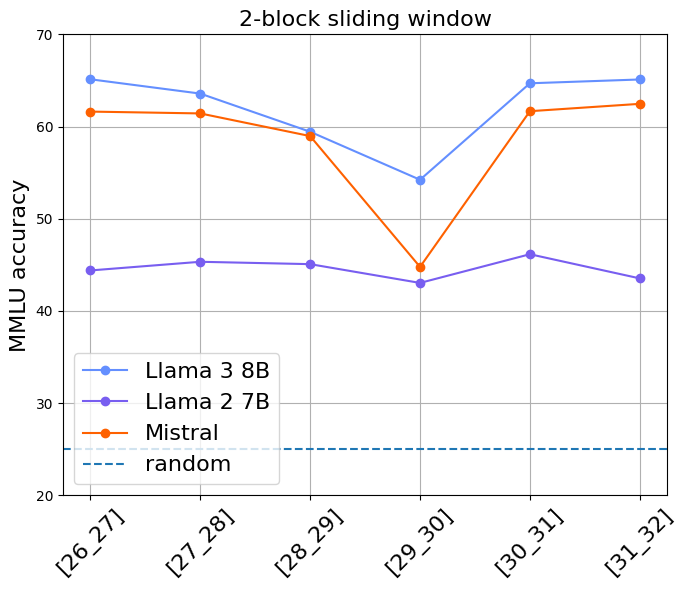

In [69]:
labels = ["["+str(x[1])+"_"+str(x[1]+1)+"]"for x in ordered_list_3_8]
fig, ax = plt.subplots(figsize=(7,6))
ax.set_xticks([x for x in range(len(values_llama3_8b))])
ax.tick_params(axis='x',labelrotation=45)
ax.set_xticklabels(labels,fontsize=16)
plt.plot(values_llama3_8b,marker='o',label="Llama 3 8B",color=cb_palette[0])
plt.plot(values_llama2_7b,marker='o',label="Llama 2 7B",color=cb_palette[1])
plt.plot(values_mistral,marker='o',label="Mistral",color=cb_palette[3])


plt.grid(True)
plt.title("2-block sliding window",fontsize=16)
plt.ylabel("MMLU accuracy",fontsize=16)
plt.ylim(20,70)
plt.axhline(y=25, linestyle='dashed',label="random")

plt.tight_layout()
plt.legend(fontsize=16)
#plt.savefig("2_block.png")

#  Figure 4
## 5 sliding windows WinoGrande 

In [70]:
def return_bmk_values_winogrande(path):
    files = sorted(os.listdir(path))
    ordered_list = [[x, int(x.split('_')[1])] for x in files]
    ordered_list.sort(key=lambda x:x[1])
    #print(len(ordered_list))
    values=[]
    for x in ordered_list:
        p = path+os.sep+x[0]
        df = pd.read_json(p)
        values.append(df["winogrande"].iloc[1])

    
    values = [x * 100 for x in values]

    return values, ordered_list

In [71]:
values_llama2_7b, ordered_list = return_bmk_values_winogrande("./csv/sliding_window/winogrande/5_sliding/llama2-7b") 
values_llama3_8b, _ = return_bmk_values_winogrande("./csv/sliding_window/winogrande/5_sliding/llama3-8b")
values_mistral, _ = return_bmk_values_winogrande("./csv/sliding_window/winogrande/5_sliding/mistral")
values_pythia, _ = return_bmk_values_winogrande("./csv/sliding_window/winogrande/5_sliding/pythia")

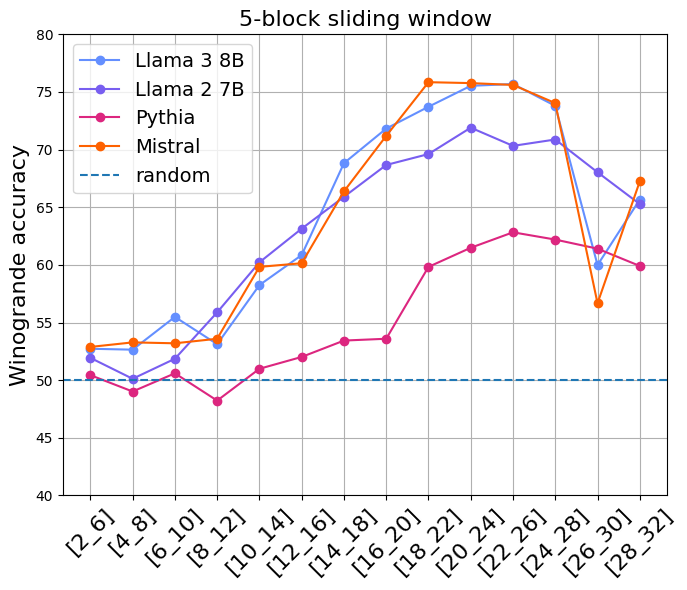

In [72]:
labels = ["["+str(x[1])+"_"+str(x[1]+4)+"]"for x in ordered_list]

fig, ax = plt.subplots(figsize=(7,6))
#ax.set_xticks(["0"]+labels)
ax.set_xticks([x for x in range(len(values_llama2_7b))])
ax.tick_params(axis='x',labelrotation=45)
ax.set_xticklabels(labels,fontsize=16)
plt.plot(values_llama3_8b,marker='o',label="Llama 3 8B",color=cb_palette[0])
plt.plot(values_llama2_7b,marker='o',label="Llama 2 7B",color=cb_palette[1])
plt.plot(values_pythia,marker='o',label="Pythia",color=cb_palette[2])
plt.plot(values_mistral,marker='o',label="Mistral",color=cb_palette[3])
plt.axhline(y=50, linestyle='dashed',label="random")


plt.grid(True)
plt.title("5-block sliding window",fontsize=16)
plt.ylabel("Winogrande accuracy",fontsize=16)
plt.ylim(40,80)
plt.tight_layout()
plt.legend(fontsize=14)
#plt.savefig("sliding.png")

#  Figure 14
## 5 sliding windows HellaSwag 5 shot 

In [73]:
def return_bmk_values_hellaswag(path):
    files = sorted(os.listdir(path))
    ordered_list = [[x, int(x.split('_')[1])] for x in files]
    ordered_list.sort(key=lambda x:x[1])
    values=[]
    for x in ordered_list:
        p = path+os.sep+x[0]
        df = pd.read_json(p)
        values.append(df["hellaswag"].iloc[1])

    
    values = [x * 100 for x in values]

    return values, ordered_list

In [74]:
values_pythia, ordered_list = return_bmk_values_hellaswag("./csv/sliding_window/hellaswag/5_sliding/pythia")
values_llama3_8b, _ = return_bmk_values_hellaswag("./csv/sliding_window/hellaswag/5_sliding/llama3-8b")
values_llama2_7b, _ = return_bmk_values_hellaswag("./csv/sliding_window/hellaswag/5_sliding/llama2-7b")
values_mistral, _ = return_bmk_values_hellaswag("./csv/sliding_window/hellaswag/5_sliding/mistral")

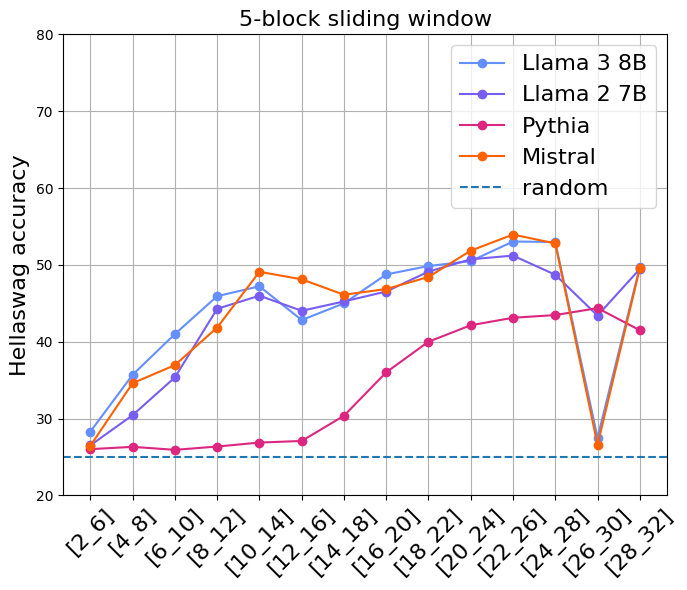

In [75]:
labels = ["["+str(x[1])+"_"+str(x[1]+4)+"]"for x in ordered_list]
fig, ax = plt.subplots(figsize=(7,6))
ax.set_xticks([x for x in range(len(values_pythia))])
ax.tick_params(axis='x',labelrotation=45)
ax.set_xticklabels(labels,fontsize=16)
plt.plot(values_llama3_8b,marker='o',label="Llama 3 8B",color=cb_palette[0])
plt.plot(values_llama2_7b,marker='o',label="Llama 2 7B",color=cb_palette[1])
plt.plot(values_pythia,marker='o',label="Pythia",color=cb_palette[2])
plt.plot(values_mistral,marker='o',label="Mistral",color=cb_palette[3])


plt.grid(True)
plt.title("5-block sliding window",fontsize=16)
plt.ylabel("Hellaswag accuracy",fontsize=16)
plt.ylim(20,80)
plt.axhline(y=25, linestyle='dashed',label="random")

plt.tight_layout()
plt.legend(fontsize=16)
#plt.savefig("hellaswag.png")